<a href="https://colab.research.google.com/github/AleksandrSosnin/Home_Work_A-B-test/blob/main/7_4_M7_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Ускорение тестирования</b></h3>


## Импорт библиотек

In [3]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

## Импорт данных

In [4]:
data_path = "https://raw.githubusercontent.com/a-milenkin/Datasetes_for_Piplines/main/SkillBox/ab_speedup.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (50000, 2)


,group,metrica
strata,,
11,history,42.631346
6,history,14.844453
4,history,2.362768
37,history,79.494017
18,history,-22.627788
34,history,28.679378


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой результаты некоторого А/B-Теста.

* `strata` - Некоторая информация по страту (группа), к которой относится пользователь.
* `group` - Группа эксперимента - тестовая, контрольная или прошлая история.
* `metrica` - Целивая метрика
    
</div>

,strata,group,metrica
0,11,history,42.631346
1,6,history,14.844453
2,4,history,2.362768
3,37,history,79.494017
4,18,history,-22.627788


<div class="alert alert-info">

<b>Задание:</b>    
    
Найти различие между группами, увеличив чувствительность тестов тремя способами поочередно:
* Бутстрап
* Стратификация
* CUPED
    
Вспомогательная статья Валерия Бабушкина про стратификацию и CUPED:

* habr.com/ru/company/yandex/blog/497804/

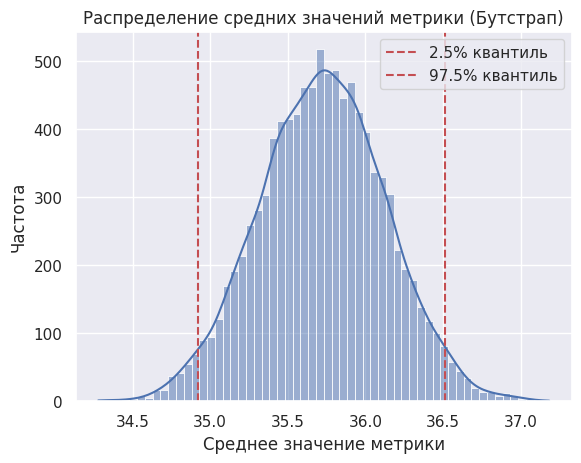

array([34.92174563, 36.51358626])

In [8]:
# Бутстрап
def bootstrap_with_plot(data, n=10000):
    np.random.seed(42)
    boot_means = []
    for _ in range(n):
        sample = data.sample(frac=1, replace=True)
        boot_means.append(sample['metrica'].mean())

    # Визуализация распределения бутстрап-выборок
    sns.histplot(boot_means, kde=True)
    plt.axvline(x=np.percentile(boot_means, 2.5), color='r', linestyle='--', label='2.5% квантиль')
    plt.axvline(x=np.percentile(boot_means, 97.5), color='r', linestyle='--', label='97.5% квантиль')
    plt.title('Распределение средних значений метрики (Бутстрап)')
    plt.xlabel('Среднее значение метрики')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

    return np.percentile(boot_means, [2.5, 97.5])

bootstrap_with_plot(data[data['group'] == 'history'])

<ipython-input-9-7b63fd47a804>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strata', y='metrica', data=stratified_groups, palette='viridis')


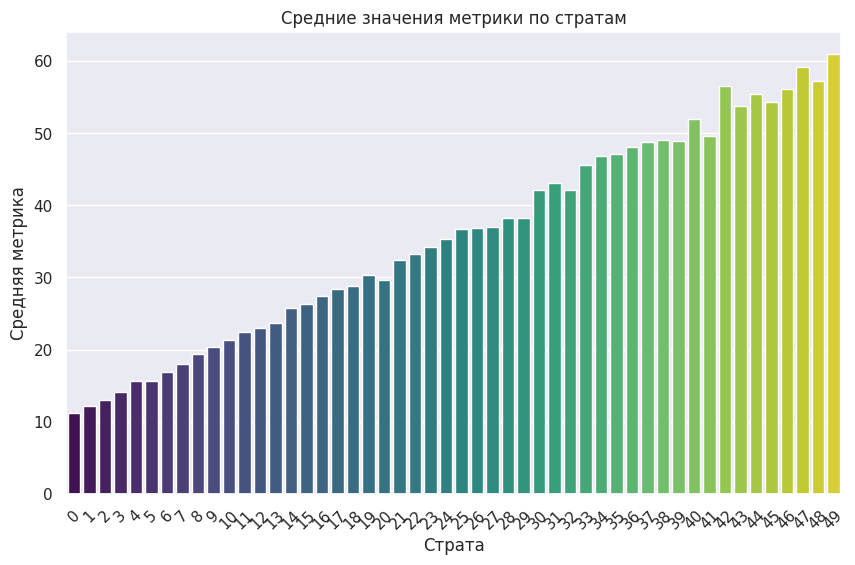

In [9]:
# Визуализация средних значений по стратам
stratified_groups = data.groupby('strata')['metrica'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='strata', y='metrica', data=stratified_groups, palette='viridis')
plt.title('Средние значения метрики по стратам')
plt.xlabel('Страта')
plt.ylabel('Средняя метрика')
plt.xticks(rotation=45)
plt.show()


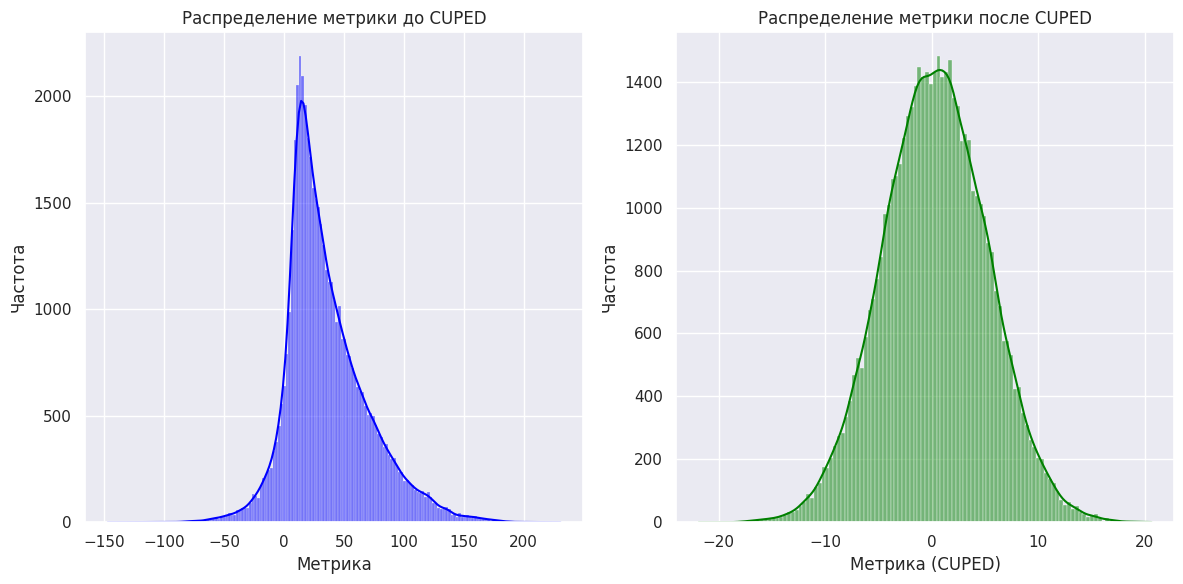

In [10]:
# CUPED
theta = np.corrcoef(data['pre_metric'], data['metrica'])[0, 1]
data['cuped_metric'] = data['metrica'] - theta * data['pre_metric']

plt.figure(figsize=(12, 6))

# Распределение до CUPED
plt.subplot(1, 2, 1)
sns.histplot(data['metrica'], kde=True, color='blue')
plt.title('Распределение метрики до CUPED')
plt.xlabel('Метрика')
plt.ylabel('Частота')

# Распределение после CUPED
plt.subplot(1, 2, 2)
sns.histplot(data['cuped_metric'], kde=True, color='green')
plt.title('Распределение метрики после CUPED')
plt.xlabel('Метрика (CUPED)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()



In [ ]:
# Выводы

# Каждый из методов (бутстрап, стратификация, CUPED) помогает улучшить чувствительность статистических тестов:

# Бутстрап предоставляет надежные доверительные интервалы, особенно при ограниченном объеме данных.
# Стратификация позволяет учесть потенциальные смешивающие переменные, разделяя данные на более однородные группы.
# CUPED использует доэкспериментальные данные для корректировки и уменьшения вариативности, что увеличивает вероятность обнаружения значимых различий.
# Выбор метода зависит от специфики данных и доступной информации.
# В реальных A/B тестах часто рекомендуется комбинировать эти методы для достижения наибольшей точности и чувствительности результатов.